In [31]:
import numpy as np
from scipy.special import binom # calculates binomial coefficient
from matplotlib import pyplot as plt

In [32]:
from functools import lru_cache

## Тест на честность монетки.


Давайте попробуем написать тест на чесность монетки. Пусть нам известно, что монетку бросили $n$ раз и из них
$k$ раз монетка выпала орлом. В качестве статистики нечестности монетки будем использовать модуль отклонения получившегося k от ожидаемого в случае если монетка честая ($n/2$).

In [33]:
def two_tailed_deviation(n_tosses, n_heads):
    return abs(n_tosses / 2 - n_heads)

@lru_cache(None)
def calc_pvalue(n_tosses, n_heads, calc_deviation):
    deviation = calc_deviation(n_tosses, n_heads)
    pvalue = 0.0
    for possible_heads_count in range(n_tosses + 1):
        if calc_deviation(n_tosses, possible_heads_count) >= deviation:
            pvalue += binom(n_tosses, possible_heads_count) * (1 / 2) ** n_tosses
    return pvalue

Проверим правильно ли мы все посчитали. Зафиксируем уровень значимости. Просимулируем

In [34]:
def simulate_tosses(n_tosses, p_head=0.5, significance_level=0.05,
                   calc_deviation=two_tailed_deviation,
                   n_simulations=10000):
    head_counts = np.random.binomial(n_tosses, p_head, n_simulations)
    positive_results = 0
    for n_heads in head_counts:
        if calc_pvalue(n_tosses, n_heads, calc_deviation) < significance_level:
            positive_results += 1
    return positive_results

In [35]:
n_tosses = 20
n_simulations = 10000

print("Симулируем броски честной монетки:")
positive_results = simulate_tosses(n_tosses, n_simulations=n_simulations)
print("{} / {} раз мы заподозрили монетку в нечестности.".format(positive_results, n_simulations))

Симулируем броски честной монетки:
411 / 10000 раз мы заподозрили монетку в нечестности.


**Задача 1.1*:**

а)* Почему доля положительных результатов нашего теста (в среднем) получается меньше заданного нами уровня значимости? (эффект особенно силен при небольшом количестве игр)

б) Чему равна точная вероятность ложно-положительного результата? (напишите формулу или код, который считает эту вероятность). 

In [38]:
p_head = 0.4
print("А теперь представим, что вероятность орла {}:".format(p_head))
n_shootouts = simulate_tosses(n_tosses, p_head=p_head)
print("{} / {} раз мы заподозрили монетку в нечестности.".format(n_shootouts, n_simulations))


А теперь представим, что вероятность орла 0.4:
1302 / 10000 раз мы заподозрили монетку в нечестности.


Как видно, если монетка нечестная, мы далеко не всегда можем с уверенностью установить это, если число бросков недостаточно велико. 

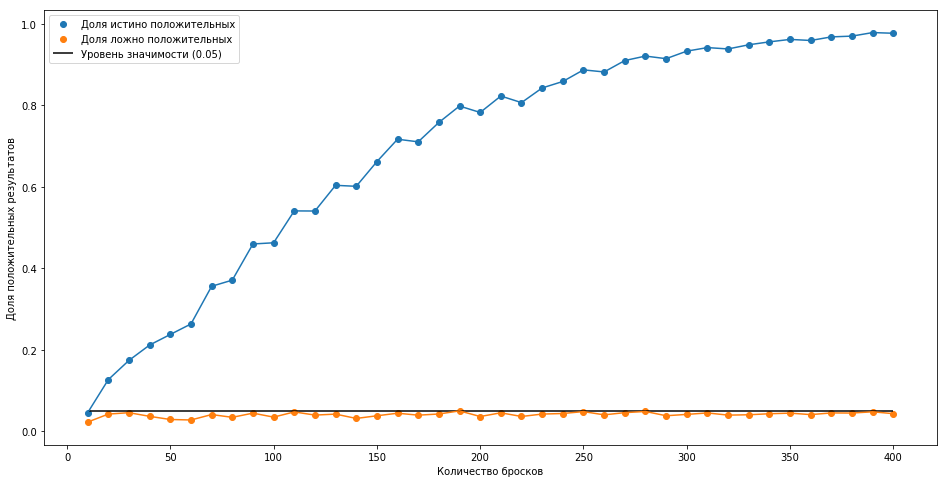

In [40]:
n_tosses_variants = [i for i in range(10, 401, 10)]
n_simulations = 10000

true_positives_counts = [simulate_tosses(n, p_head, n_simulations=n_simulations) / n_simulations
                  for n in n_tosses_variants]
false_positives_counts = [simulate_tosses(n, p_head=0.5, n_simulations=n_simulations) / n_simulations
                   for n in n_tosses_variants]

plt.rc("figure", figsize=(16, 8))
plt.plot(n_tosses_variants, true_positives_counts)
plt.scatter(n_tosses_variants, true_positives_counts, label='Доля истино положительных')
plt.plot(n_tosses_variants, false_positives_counts)
plt.scatter(n_tosses_variants, false_positives_counts, label='Доля ложно положительных')
plt.hlines(0.05, min(n_tosses_variants), max(n_tosses_variants), label="Уровень значимости (0.05)")
plt.xlabel("Количество бросков")
plt.ylabel("Доля положительных результатов")
plt.legend()
plt.show()

А теперь заставим тест пытаться детектировать не случаи когда монетка нечестная, а только те, когда она нечестная в меньшую сторону (как если бы мы играли в орлянку ставя на орла и были бы очень обеспокоены, если бы кто-то нас обманывал с помощью нечестной монетки) 

In [41]:
def one_tailed_deviation(n_tosses, n_heads):
    return n_tosses / 2 - n_heads

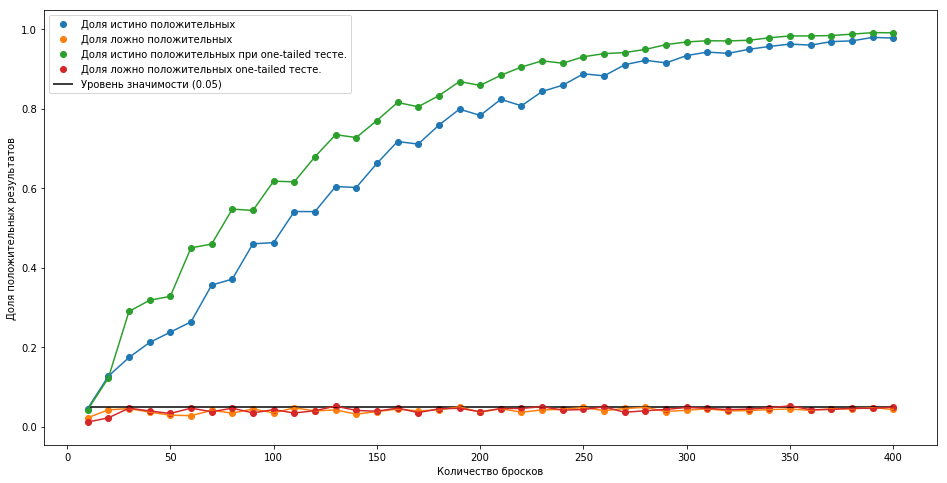

In [43]:
n_tosses_variants = [i for i in range(10, 401, 10)]
n_simulations = 10000

true_one_tailed_positives_counts = [
    simulate_games(n, p_head, n_simulations=n_simulations,
                   calc_deviation=one_tailed_deviation) / n_simulations
    for n in n_tosses_variants
]
false_one_tailed_positives_counts = [
    simulate_games(n, p_head=0.5, n_simulations=n_simulations,
                   calc_deviation=one_tailed_deviation) / n_simulations
    for n in n_tosses_variants
]

plt.rc("figure", figsize=(16, 8))
plt.plot(n_tosses_variants, true_positives_counts)
plt.scatter(n_tosses_variants, true_positives_counts, label='Доля истино положительных')
plt.plot(n_tosses_variants, false_positives_counts)
plt.scatter(n_tosses_variants, false_positives_counts, label='Доля ложно положительных')
plt.plot(n_tosses_variants, true_one_tailed_positives_counts)
plt.scatter(n_tosses_variants, true_one_tailed_positives_counts, label='Доля истино положительных при one-tailed тесте.')
plt.plot(n_tosses_variants, false_one_tailed_positives_counts)
plt.scatter(n_tosses_variants, false_one_tailed_positives_counts, label='Доля ложно положительных one-tailed тесте.')
plt.hlines(0.05, min(n_tosses_variants), max(n_tosses_variants), label="Уровень значимости (0.05)")
plt.xlabel("Количество бросков")
plt.ylabel("Доля положительных результатов")
plt.legend()
plt.show()

## Задача